<a href="https://colab.research.google.com/github/Divi-R0706/Stock_market_prediction/blob/main/D1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [32]:
df=pd.read_csv("/content/random_stock_market_dataset.csv")

In [33]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-01-01,296.45,307.31,293.96,303.72,93133
1,2024-01-02,190.11,193.10,187.21,191.40,64993
2,2024-01-03,197.41,208.64,193.37,205.89,70326
3,2024-01-04,253.13,262.67,248.67,258.95,17358
4,2024-01-05,241.35,253.09,238.99,252.20,20847


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    60 non-null     object 
 1   Open    60 non-null     float64
 2   High    60 non-null     float64
 3   Low     60 non-null     float64
 4   Close   60 non-null     float64
 5   Volume  60 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


In [35]:
df.describe()

,Open,High,Low,Close,Volume
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,310.552000,322.589833,308.056833,320.412667,95405.516667
std,108.859051,109.095813,108.986426,109.157159,54895.342146
min,112.680000,123.780000,109.430000,121.270000,13193.000000
25%,222.957500,238.247500,220.042500,237.242500,48016.500000
50%,303.240000,313.800000,302.385000,309.385000,93850.500000
75%,396.150000,415.915000,392.905000,413.462500,130917.250000
max,492.790000,501.670000,492.300000,500.420000,195189.000000


In [65]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [68]:
# Re-instantiate and re-fit the model with the correct stock market data features
model = LinearRegression()
model.fit(x_train, y_train)

# Recalculate y_pred for the stock market data to match y_test
y_pred = model.predict(x_test)

comp = pd.DataFrame({'Actual': y_test.values, 'Predicted': np.round(y_pred, 3)})
print("\nSample comparison:")
print(comp.head(6))


Sample comparison:
   Actual  Predicted
0  303.72    305.066
1  500.42    500.252
2  373.51    372.726
3  414.04    412.633
4  491.99    489.748
5  435.79    434.470


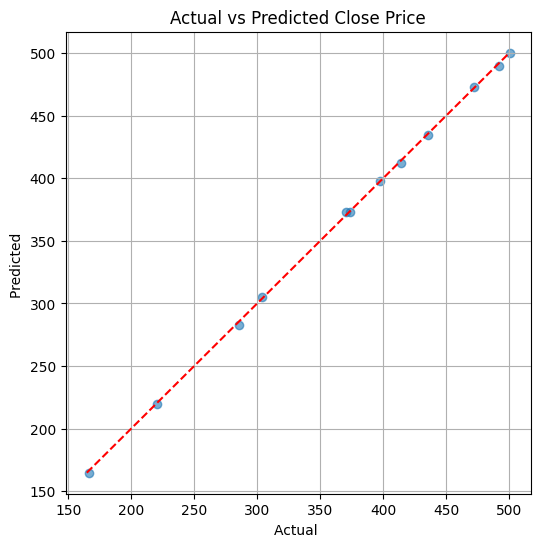

In [70]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
mn = min(y_test.min(), y_pred.min())
mx = max(y_test.max(), y_pred.max())
plt.plot([mn,mx],[mn,mx], 'r--')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted Close Price')
plt.grid(True)
plt.show()

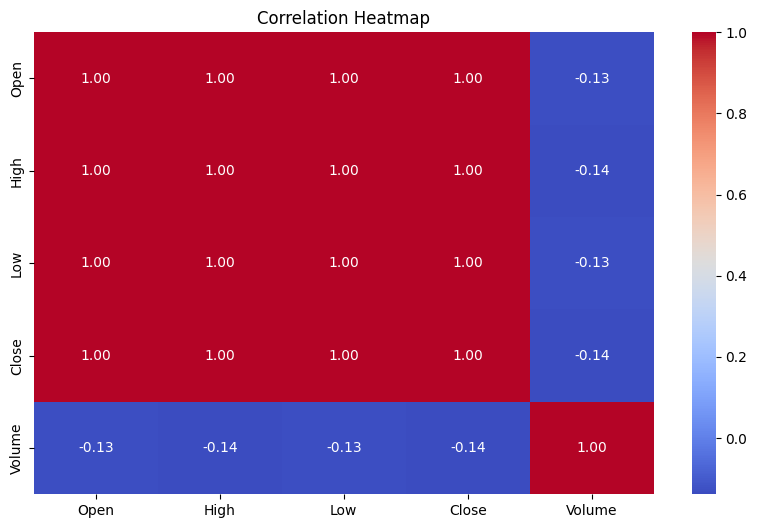

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

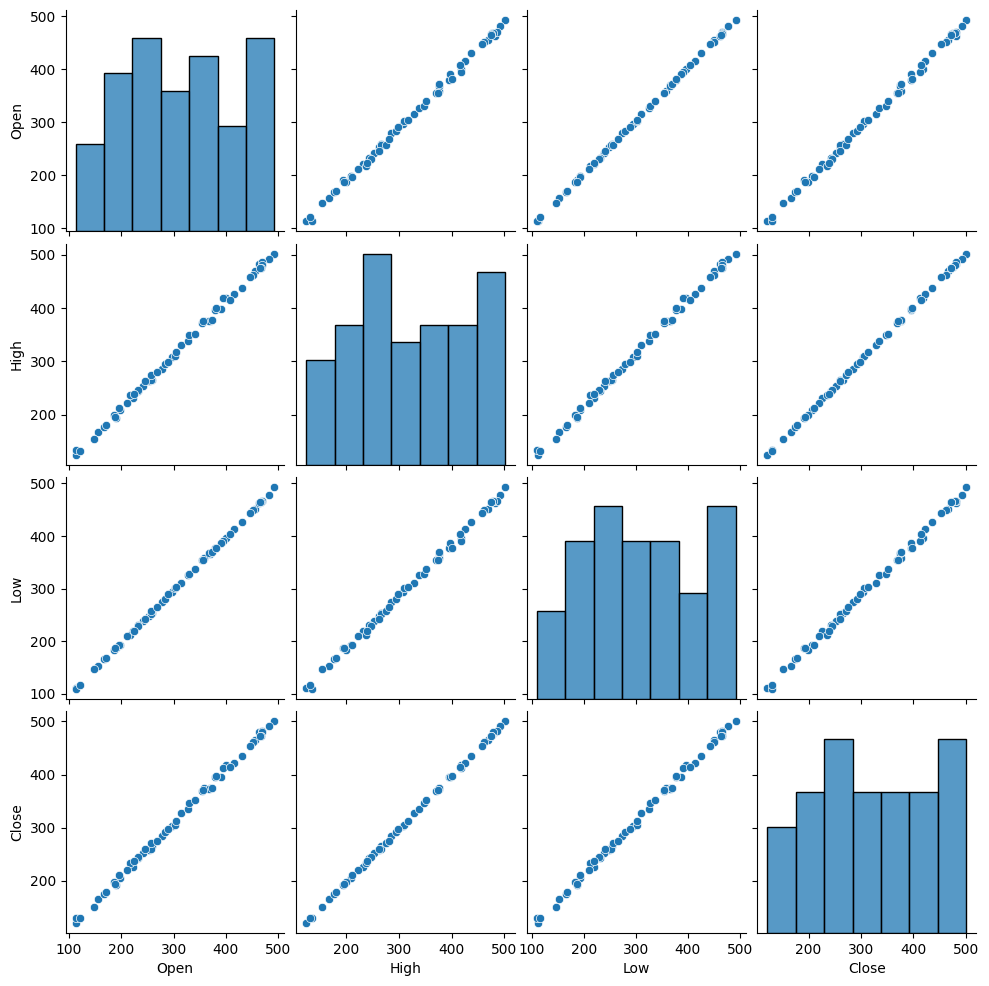

In [46]:
#numeric features in dataset
numeric_features=['Open','High','Low','Close']
sns.pairplot(df[numeric_features])
plt.show()

In [48]:
#feature selection
features=['Open','High','Low','Volume']
x=df[features]
y=df['Close']

In [49]:
#data spliting
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [50]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [51]:
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: -0.9705474849357074
Coefficients: [-2.43505472e-01  9.91700376e-01  2.51613523e-01 -5.37297491e-06]


In [52]:
#prediction
y_pred=model.predict(x_test)
y_pred

array([305.0656076 , 500.2522393 , 372.72564442, 412.63324303,
       489.7480201 , 434.46989382, 282.88965569, 473.28948656,
       164.71739491, 373.08417768, 397.72543932, 219.76641378])

In [53]:
#check corrcet predictions or not
mse=mean_squared_error(y_test,y_pred) #loss is very high model accuracy is very low
mse

2.2971921118606304

In [55]:
#in range(0,1)
r2=r2_score(y_test,y_pred)
r2 # loss is > 0.9 model is proper

0.9997790936407331

Loss Funtion


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score as r2_scorer_func

In [57]:
np.random.seed(42)
x=np.linspace(0,10,100).reshape(-1,1)
y=3*x.flatten()+5+np.random.normal(0,3,100)

In [58]:
#fit linear regression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)

In [59]:
mae=mean_absolute_error(y,y_pred)
mse=mean_squared_error(y,y_pred)
rase=np.sqrt(mse)
r2_value=r2_scorer_func(y,y_pred)

In [62]:
print("--------------Loss funtion------------------")
print("Mean absolute error:",mae)
print("Mean squared error:",mse)
print("Root mean squared error:",rase)
print("R2 score:",r2_value)

--------------Loss funtion------------------
Mean absolute error: 2.144888844288582
Mean squared error: 7.334142421482705
Root mean squared error: 2.7081621852250106
R2 score: 0.9146941180074883



Error Comparison Table:
  Metric     Value
0    MAE  2.144889
1    MSE  7.334142
2   RMSE  7.221588
3     R2  0.999779


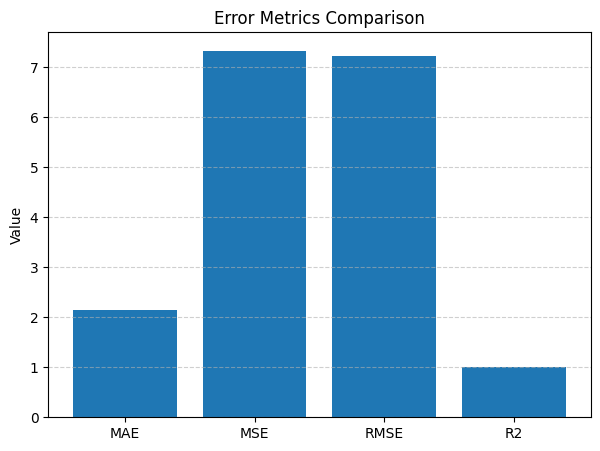

In [63]:
errors = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
}
error_df = pd.DataFrame(list(errors.items()), columns=['Metric', 'Value'])
print("\nError Comparison Table:")
print(error_df)
plt.figure(figsize=(7,5))
plt.bar(error_df['Metric'], error_df['Value'])
plt.title("Error Metrics Comparison")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
